In [16]:
from matplotlib import pyplot
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import models
from tensorflow.keras import layers

### Note:

***In machine learning, a category in a classification problem is called a class. Data
points are called samples. The class associated with a specific sample is called a
label.***

In [18]:
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

#### train dataset

In [3]:
train_img.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### test dataset

In [6]:
test_img.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### model

In [9]:
network = models.Sequential()

network.add(layers.Dense(units=512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(units=10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
train_img = train_img.reshape((60000, 28 * 28))
train_img = train_img.astype('float32') / 255
train_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
test_img = test_img.reshape((10000, 28 * 28))
test_img = test_img.astype('float32') / 255
test_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
network.fit(train_img, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2024 - accuracy: 0.9395 - ETA: 5s - loss: 0.5602 - accuracy: 0.8378

In [15]:
test_loss, test_acc = network.evaluate(test_img, test_labels)
print(f'test loss: {test_loss}\ntest accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9796

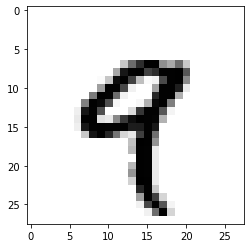

In [19]:
digit = train_img[4]

pyplot.imshow(digit, cmap=pyplot.cm.binary)
pyplot.show()